In [1]:
suppressMessages(library(Seurat))
suppressMessages(library(ggplot2))
suppressMessages(library(patchwork))
suppressMessages(library(dplyr))
suppressMessages(library(viridis))
suppressMessages(library(cowplot))
suppressMessages(library(anndataR))
suppressMessages(library(ComplexHeatmap))
library(abind)

In [2]:
in_dir <- "../../results/05_fibroblast/06_cell_state_score"
out_dir <- "../../results/05_fibroblast/15_co_localization"

if(!dir.exists(out_dir)){
    dir.create(out_dir, recursive = TRUE)
}

In [3]:
sample_list <- c('HC01', 'HC02', 'HC03', 'HC05',
                 'SSc4994', 
                 'SSc5380', 
               'SSc-HL01', 'SSc-HL05', 'SSc-HL06', 'SSc-HL11',
               'SSc-HL13', 'SSc-HL25', 'SSc-HL33', 'SSc-HL35')

In [4]:
for(sample in sample_list){
    obj <- readRDS(glue::glue("{in_dir}/{sample}.rds"))
    
    df1 <- obj@meta.data %>%
            subset(select = c('Fib1', 'Fib10', 'Fib2', 'Fib3', 'Fib4', 'Fib5', 'Fib6', 'Fib7', 'Fib8', 'Fib9'))

    df2 <- obj@meta.data %>%
            subset(select = c('Fib1', 'Fib10', 'Fib2', 'Fib3', 'Fib4', 'Fib5', 'Fib6', 'Fib7', 'Fib8', 'Fib9'))
    
    df_cor <- as.data.frame(cor(df2, df1, method="spearman"))
    
    write.csv(df_cor, glue::glue("{out_dir}/{sample}.csv"))
}

In [5]:
df_cor_list <- lapply(sample_list, function(sample){
    df_cor = read.csv(glue::glue("{out_dir}/{sample}.csv"), row.names = 1)
    return(df_cor)
})

In [6]:
df_cor_list[[1]]

,Fib1,Fib10,Fib2,Fib3,Fib4,Fib5,Fib6,Fib7,Fib8,Fib9
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Fib1,1.000000000,-0.002790743,0.410212970,0.71960566,0.53378843,-0.02615443,0.3590894,0.252764465,0.88456454,-0.001297105
Fib10,-0.002790743,1.000000000,0.439293644,0.28982351,0.46976360,0.40139978,0.2063732,0.330832865,0.05271727,0.011263405
Fib2,0.410212970,0.439293644,1.000000000,0.52931211,0.58616627,0.13499398,0.3195643,0.432366381,0.47738108,-0.001403142
Fib3,0.719605657,0.289823507,0.529312106,1.00000000,0.83017995,0.04614024,0.2548935,0.330676628,0.74001190,-0.146035641
Fib4,0.533788428,0.469763597,0.586166268,0.83017995,1.00000000,0.23119426,0.3566845,0.386467471,0.62857131,-0.032705565
Fib5,-0.026154434,0.401399784,0.134993983,0.04614024,0.23119426,1.00000000,0.4567149,0.105159130,0.11450691,0.441411092
Fib6,0.359089358,0.206373238,0.319564286,0.25489350,0.35668447,0.45671489,1.0000000,0.206178466,0.51288085,0.469154335
Fib7,0.252764465,0.330832865,0.432366381,0.33067663,0.38646747,0.10515913,0.2061785,1.000000000,0.27867423,0.004086627
Fib8,0.884564544,0.052717270,0.477381079,0.74001190,0.62857131,0.11450691,0.5128809,0.278674228,1.00000000,0.119350747


In [7]:
array_3d <- abind(lapply(df_cor_list, function(df) as.matrix(df)), along = 3)
mean_matrix <- apply(array_3d, c(1, 2), mean)

In [8]:
mean_matrix

,Fib1,Fib10,Fib2,Fib3,Fib4,Fib5,Fib6,Fib7,Fib8,Fib9
Fib1,1.00000000,0.099880315,0.6010629,0.52652136,0.3688893,-0.13934161,0.4581909,0.42570767,0.84833116,0.478899027
Fib10,0.09988031,1.000000000,0.2905634,0.46870713,0.5445131,0.41958592,0.1538937,0.34509020,0.11790364,0.005884632
Fib2,0.60106289,0.290563389,1.0000000,0.35498741,0.2904433,-0.16418218,0.4394647,0.58456423,0.60677130,0.505301519
Fib3,0.52652136,0.468707133,0.3549874,1.00000000,0.8545419,0.27272164,0.1803192,0.35179011,0.52506706,0.031540420
Fib4,0.36888932,0.544513132,0.2904433,0.85454193,1.0000000,0.43913746,0.2615054,0.33118080,0.44343050,0.034259301
Fib5,-0.13934161,0.419585921,-0.1641822,0.27272164,0.4391375,1.00000000,0.1317565,-0.02623585,-0.03117145,-0.062021110
Fib6,0.45819094,0.153893750,0.4394647,0.18031916,0.2615054,0.13175654,1.0000000,0.35330654,0.62546458,0.591938370
Fib7,0.42570767,0.345090200,0.5845642,0.35179011,0.3311808,-0.02623585,0.3533065,1.00000000,0.44237775,0.299262346
Fib8,0.84833116,0.117903640,0.6067713,0.52506706,0.4434305,-0.03117145,0.6254646,0.44237775,1.00000000,0.558654265
Fib9,0.47889903,0.005884632,0.5053015,0.03154042,0.0342593,-0.06202111,0.5919384,0.29926235,0.55865427,1.000000000


In [9]:
# Scaling each row
# scaled_mat <- t(apply(mean_matrix, 1, scale))
# colnames(scaled_mat) <- colnames(mean_matrix)

In [10]:
options(repr.plot.height = 5, repr.plot.width = 6)

ht <- Heatmap(as.matrix(mean_matrix),
              name = 'Correlation',
              rect_gp = gpar(col = "black", lwd = 0.5),
              cluster_columns = TRUE,
              cluster_rows = TRUE,
              clustering_method_rows = 'ward.D2',
              clustering_method_columns = 'ward.D2'
             )

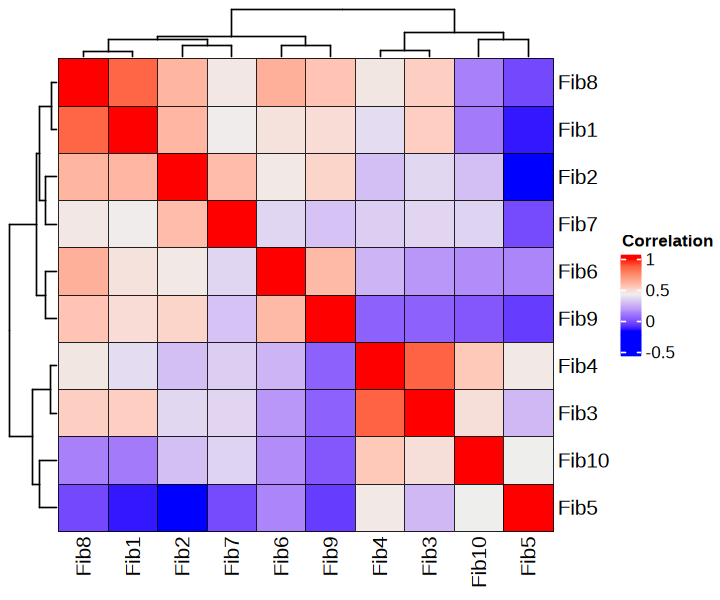

In [11]:
draw(ht)